In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_colwidth', 2000)
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 4000

In [2]:
books=pd.read_csv('books.csv')
books

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m/3.jpg,https://images.gr-assets.com/books/1474154022s/3.jpg
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m/41865.jpg,https://images.gr-assets.com/books/1361039443s/41865.jpg
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m/2657.jpg,https://images.gr-assets.com/books/1361975680s/2657.jpg
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m/4671.jpg,https://images.gr-assets.com/books/1490528560s/4671.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m/7130616.jpg,https://images.gr-assets.com/books/1307445460s/7130616.jpg
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png,https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf249278a81aabab721ef782c4a74.png
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m/77431.jpg,https://images.gr-assets.com/books/1455373531s/77431.jpg
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from the Frontlines of the New Girlie-Girl Culture,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m/8565083.jpg,https://images.gr-assets.com/books/1279214118s/8565083.jpg


In [3]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [4]:
ratings=pd.read_csv('ratings.csv')
ratings.head()

# combine ratings table and ratings to_read to group and plot user groups and their avg rating

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [5]:
tags=pd.read_csv('tags.csv')
tags.head(20)

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-
5,5,--166-
6,6,--17-
7,7,--19-
8,8,--2-
9,9,--258-


In [6]:
tags['tag_name'].nunique()

34252

In [7]:
to_read=pd.read_csv('to_read.csv')
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [8]:
book_tags=pd.read_csv('book_tags.csv')
book_tags

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716
...,...,...,...
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7


## Exploratory Data Analysis & Data Preprocessing

In [9]:
# dimension of dataset
print(f'''\t  Books shape is {books.shape}
          Ratings shape is {ratings.shape}
          Tags shape is {tags.shape}
          to_read shape is {to_read.shape}
          Tagsbook_tags shape is {book_tags.shape}''')

	  Books shape is (10000, 23)
          Ratings shape is (981756, 3)
          Tags shape is (34252, 2)
          to_read shape is (912705, 2)
          Tagsbook_tags shape is (999912, 3)


In [10]:
# Fetching unique book count
books['book_id'].nunique()

10000

In [11]:
books.isna().sum()

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

isbn is a unique identifier for books so having nans in this column is not good. But in this case, we have book_id as an alternate option so moving forward, we will be using the book_id to refer to each book

## 2. Plot the distribution of genres

In [12]:
# Checking unique genres and their counts

genres = book_tags.groupby('tag_id').sum().reset_index()[['tag_id', 'count']]
genres

,tag_id,count
0,0,24
1,1,6
2,2,3
3,3,3
4,4,3
...,...,...
34247,34247,353
34248,34248,7456
34249,34249,222
34250,34250,24


In [13]:
book_n_tags = pd.merge(book_tags, tags, on='tag_id')[['goodreads_book_id', 'tag_name', 'tag_id', 'count']]
book_n_tags.head()

,goodreads_book_id,tag_name,tag_id,count
0,1,to-read,30574,167697
1,2,to-read,30574,24549
2,3,to-read,30574,496107
3,5,to-read,30574,11909
4,6,to-read,30574,298


In [14]:
# merging genres and tags tables so we can include genre names in the plot

genres2 = pd.merge(genres, tags, on='tag_id')
genres3 = genres2.sort_values(by='count', ascending=False)
genres3

,tag_id,count,tag_name
30574,30574,140718761,to-read
8717,8717,7507958,currently-reading
11557,11557,4503173,favorites
11743,11743,3688819,fiction
11305,11305,3548157,fantasy
...,...,...,...
2278,2278,1,american-20c
7820,7820,1,comics-later-volumes
23158,23158,1,paused-and-not-intending-to-resume
2272,2272,-1,america-in-retreat


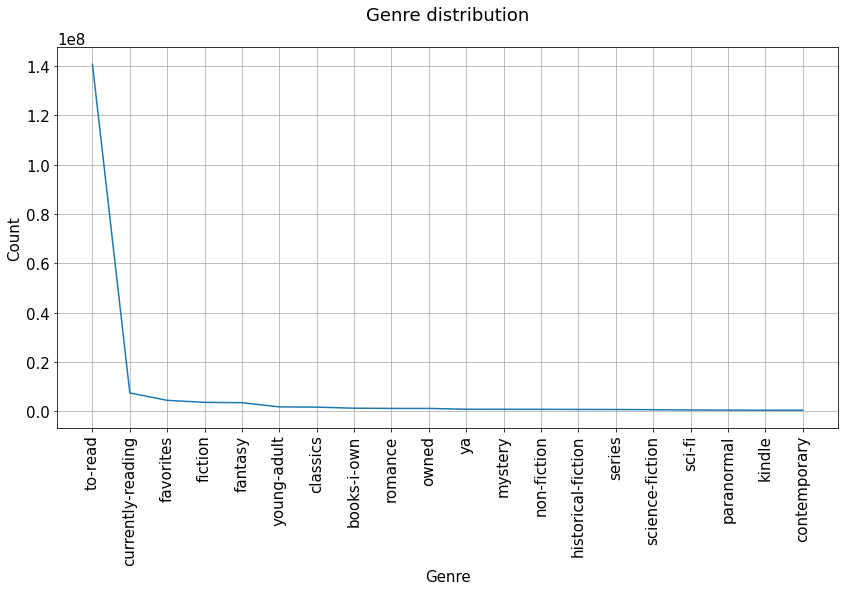

In [15]:
plt.rc("font", size=15)
fig = plt.subplots(figsize=(14, 7))
plt.plot(genres3['tag_name'].head(20), genres3['count'].head(20))
plt.title('Genre distribution\n')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Since there is more than 30,000 unique tags, some of them cannot even be considered as a proper genre. Regardless, due to the high number of tags, we are plotting just the top 20 most popular genres. 

Removing to-read, currently-reading and favorites are not technically genres and checking the distribution.

In [16]:
genres4 = genres3.iloc[3:][['tag_name', 'count']]
genres4

,tag_name,count
11743,fiction,3688819
11305,fantasy,3548157
33114,young-adult,1848306
7457,classics,1756920
5207,books-i-own,1317235
...,...,...
2278,american-20c,1
7820,comics-later-volumes,1
23158,paused-and-not-intending-to-resume,1
2272,america-in-retreat,-1


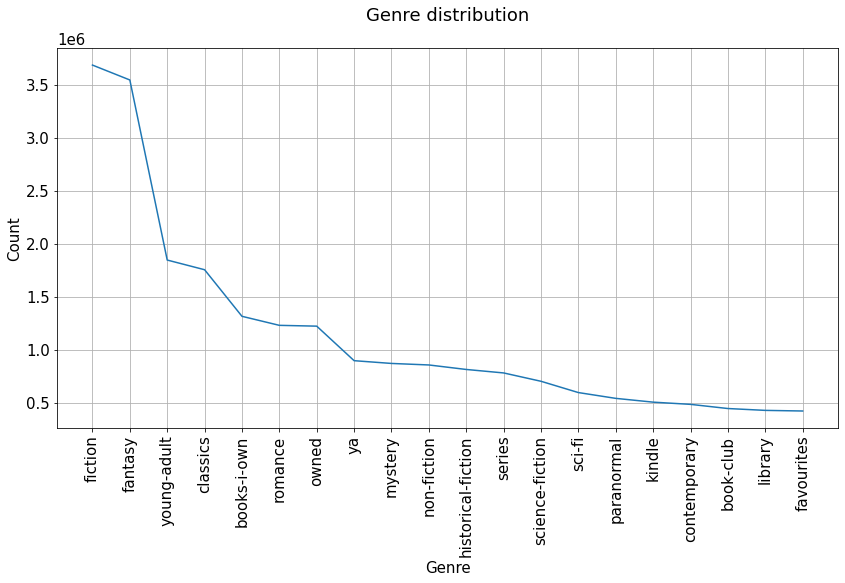

In [17]:
plt.rc("font", size=15)
fig = plt.subplots(figsize=(14, 7))
plt.plot(genres4['tag_name'].head(20), genres4['count'].head(20))
plt.title('Genre distribution\n')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

### 3. Plot the distribution of ratings - FROM RATINGS file.

Plotting rating distribution from the ratings table first

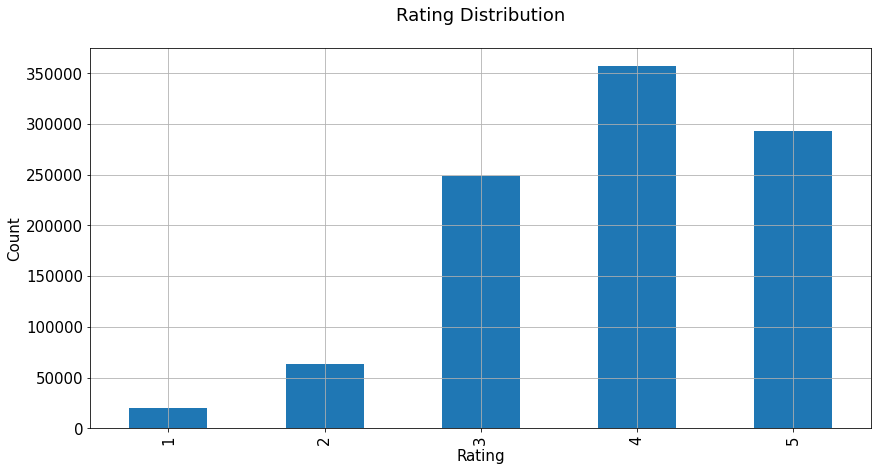

In [18]:
plt.rc("font", size=15)
fig = plt.subplots(figsize=(14, 7))
ratings['rating'].value_counts(sort=False).sort_index().plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

### Plotting rating distribution from BOOKS table

In [19]:
q3 = books['average_rating'].round(decimals = 0).value_counts().reset_index()
q3

,index,average_rating
0,4.0,9532
1,3.0,338
2,5.0,129
3,2.0,1


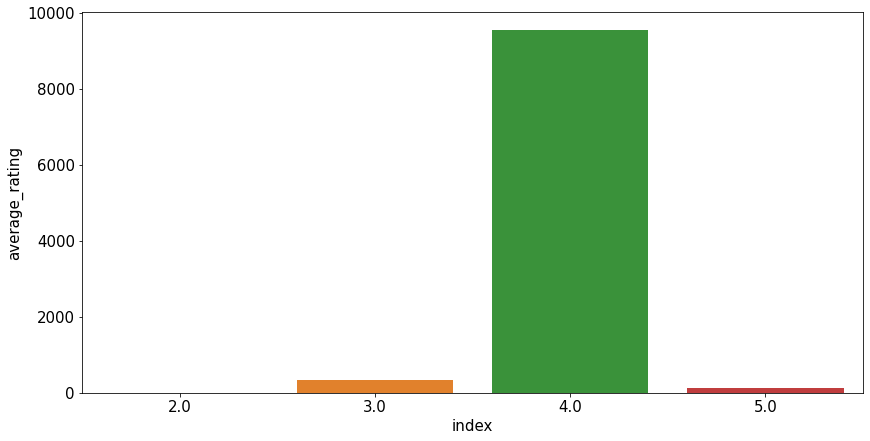

In [20]:
import seaborn as sns

plt.rc("font", size=15)
fig = plt.subplots(figsize=(14, 7))
sns.barplot(q3['index'], q3['average_rating'] )
plt.show()

### Rating distribution is different for books table and ratings table as reflected in the distribution chart.

## 4.Group the dataset by users, calculate the average of rating for each group on plot the average ratings (x-axis: ratings from 1-5, y-axis: count of users with that average rating)

In [21]:
# calculating book count for each user

ratings_copy = ratings.copy()
ratings_copy['book_count'] = 0

ratings_copy = ratings_copy.groupby(['user_id'])['book_count'].agg('count').reset_index()
ratings_copy

,user_id,book_count
0,1,3
1,2,3
2,3,2
3,4,3
4,5,5
...,...,...
53419,53420,6
53420,53421,8
53421,53422,18
53422,53423,2


In [22]:
#setting conditions to group the users

conditions = [
    (ratings_copy['book_count'] < 11),
    (ratings_copy['book_count'] >= 11) & (ratings_copy['book_count'] < 26),
    (ratings_copy['book_count'] >= 26) & (ratings_copy['book_count'] < 51),
    (ratings_copy['book_count'] >= 51)
]

values = ['<10 books', '11-25 books', '26-50 books', '50+ books']
ratings_copy['book_cnt_grp'] = np.select(conditions, values)
ratings_copy

,user_id,book_count,book_cnt_grp
0,1,3,<10 books
1,2,3,<10 books
2,3,2,<10 books
3,4,3,<10 books
4,5,5,<10 books
...,...,...,...
53419,53420,6,<10 books
53420,53421,8,<10 books
53421,53422,18,11-25 books
53422,53423,2,<10 books


In [23]:
# average rating for each user
averageR = pd.merge(ratings, ratings_copy, on='user_id')
averageR

,book_id,user_id,rating,book_count,book_cnt_grp
0,1,314,5,181,50+ books
1,3,314,3,181,50+ books
2,5,314,4,181,50+ books
3,6,314,5,181,50+ books
4,12,314,4,181,50+ books
...,...,...,...,...,...
981751,9985,43623,5,2,<10 books
981752,9988,24406,5,2,<10 books
981753,9997,24406,5,2,<10 books
981754,9991,27590,4,2,<10 books


In [24]:
q4 = averageR.groupby('book_cnt_grp').mean().reset_index()
q4

,book_cnt_grp,book_id,user_id,rating,book_count
0,11-25 books,6403.382744,26037.957463,3.859547,17.779237
1,26-50 books,5253.394745,25567.744584,3.857234,37.092739
2,50+ books,3251.399539,24922.250838,3.844430,101.276655
3,<10 books,7428.176958,27187.956879,3.887347,5.867828


Text(0, 0.5, 'Rating')

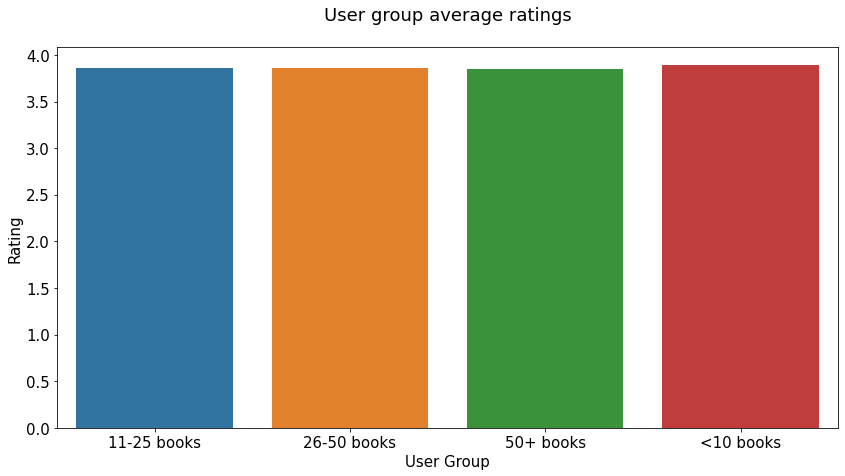

In [25]:
plt.rc("font", size=15)
fig = plt.subplots(figsize=(14, 7))


sns.barplot(x=q4['book_cnt_grp'], y=q4['rating'])
plt.title('User group average ratings\n')
plt.xlabel('User Group')
plt.ylabel('Rating')

## 5. How many languages are there in the dataset? A plot of number of books per language is required here. Based on the plot, are there languages that you want to discard from your dataset?

In [26]:
books['language_code'].unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

In [27]:
books['language_code'].nunique()

# There are 25 languages in the dataset

25

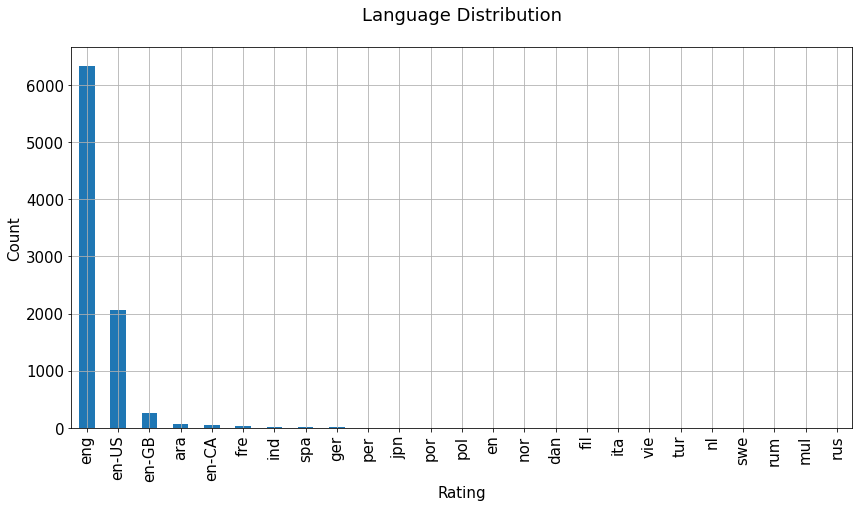

In [28]:
# Plotting language Distribution

plt.rc("font", size=15)
fig = plt.subplots(figsize=(14, 7))
books['language_code'].value_counts(sort=True).plot(kind='bar')
plt.title('Language Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

From the plot it is clear that below 16 languages can be discarded:

'nl', 'por', 'nor', 'jpn', 'en', 'vie',  'pol', 'tur', 'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'

In [29]:
# Dropping entries with language_code from the discard list

discard_lang = ['nl', 'por', 'nor', 'jpn', 'en', 'vie', 'pol', 'tur', 'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus']
books.drop(books[(books['language_code'].isin(discard_lang)) ].index, inplace=True)

books['language_code'].unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'ara', 'ger',
       'ind'], dtype=object)

In [30]:
# Filling nan in language_code column in books dataframe with eng as it is clear from the above plot that it is the most frequest value 
books = books.fillna({"language_code": "eng"})

In [31]:
books.isna().sum()

id                             0
book_id                        0
best_book_id                   0
work_id                        0
books_count                    0
isbn                         688
isbn13                       575
authors                        0
original_publication_year     21
original_title               581
title                          0
language_code                  0
average_rating                 0
ratings_count                  0
work_ratings_count             0
work_text_reviews_count        0
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
image_url                      0
small_image_url                0
dtype: int64

In [32]:
# Encoding categorical column to numeric data for future use

cleanup_nums = {'language_code':     {'eng' : 1, 'en-US': 2, 'en-CA':3, 'spa': 4, 'en-GB': 5, 'fre': 6, 'ara': 7, 'ger': 8,'ind': 9}}

books = books.replace(cleanup_nums)
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m/3.jpg,https://images.gr-assets.com/books/1474154022s/3.jpg
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m/41865.jpg,https://images.gr-assets.com/books/1361039443s/41865.jpg
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m/2657.jpg,https://images.gr-assets.com/books/1361975680s/2657.jpg
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m/4671.jpg,https://images.gr-assets.com/books/1490528560s/4671.jpg


## 6. Use the different datasets accompanying the ratings dataset to determine what factors (publication year, ratings count, number of books by the author etc.) have an influence on a book’s rating?

In [33]:
books

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m/3.jpg,https://images.gr-assets.com/books/1474154022s/3.jpg
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m/41865.jpg,https://images.gr-assets.com/books/1361039443s/41865.jpg
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m/2657.jpg,https://images.gr-assets.com/books/1361975680s/2657.jpg
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m/4671.jpg,https://images.gr-assets.com/books/1490528560s/4671.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m/7130616.jpg,https://images.gr-assets.com/books/1307445460s/7130616.jpg
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png,https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf249278a81aabab721ef782c4a74.png
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m/77431.jpg,https://images.gr-assets.com/books/1455373531s/77431.jpg
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from the Frontlines of the New Girlie-Girl Culture,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m/8565083.jpg,https://images.gr-assets.com/books/1279214118s/8565083.jpg


In [34]:
books.isna().sum()
## Creating copy of books
books_new_copy = books.copy()

In [35]:
#dropping last two columns containing image URLs which will not be required for analysis
books_new_copy.drop(['image_url', 'small_image_url'],axis=1,inplace=True)
books_new_copy.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,1,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,1,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,2,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,1,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,1,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


In [36]:
#dropping id, best_book_id, work_id, isbn, isbn13 since it is not referenced in any related data files.
books_new_copy.drop(['id', 'best_book_id','work_id','isbn','isbn13'],axis=1,inplace=True)
books_new_copy.head()

,book_id,books_count,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,2767052,272,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",1,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",1,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,41865,226,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",2,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,1,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,1,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


In [37]:
#dropping original_title, work_ratings_count, work_text_reviews_count, ratings_1, ratings_2, ratings_3, ratings_4, ratings_5
# title is duplicate of original_title
# Rating counts, work_ratings_counts and related field are of less importance for recommender system as we want to recommend based average rating, author, language, tags
books_new_copy.drop(['original_title','work_ratings_count','work_text_reviews_count','ratings_1','ratings_2','ratings_3','ratings_4','ratings_5'],axis=1,inplace=True)
books_new_copy.head()

,book_id,books_count,authors,original_publication_year,title,language_code,average_rating,ratings_count
0,2767052,272,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",1,4.34,4780653
1,3,491,"J.K. Rowling, Mary GrandPré",1997.0,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",1,4.44,4602479
2,41865,226,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",2,3.57,3866839
3,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,1,4.25,3198671
4,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,1,3.89,2683664


#### Checking null values and value range for columns

Removing nulls is important as algorithm would treat as one unique value.

In [38]:
books_new_copy.dtypes

book_id                        int64
books_count                    int64
authors                       object
original_publication_year    float64
title                         object
language_code                  int64
average_rating               float64
ratings_count                  int64
dtype: object

In [39]:
books_new_copy.isna().sum()

book_id                       0
books_count                   0
authors                       0
original_publication_year    21
title                         0
language_code                 0
average_rating                0
ratings_count                 0
dtype: int64

In [40]:
books_new_copy['original_publication_year']=pd.to_numeric(books_new_copy['original_publication_year'])

print(sorted(books_new_copy['original_publication_year'].unique()))

[-750.0, -720.0, -500.0, 975.0, 1390.0, 1513.0, 1595.0, 1598.0, 1600.0, 1603.0, 1605.0, 1606.0, 1611.0, 1719.0, 1726.0, 1759.0, 1811.0, 1813.0, 1814.0, 1815.0, 1817.0, 1818.0, 1838.0, 1843.0, 1844.0, 1847.0, 1849.0, 1850.0, 1851.0, 1852.0, 1856.0, 1859.0, 1860.0, 1862.0, 1865.0, 1866.0, 1868.0, 1869.0, 1876.0, 1877.0, 1880.0, 1882.0, 1884.0, 1886.0, 1887.0, 1891.0, 1892.0, 1895.0, 1897.0, 1899.0, 1900.0, 1901.0, 1902.0, 1903.0, 1904.0, 1905.0, 1908.0, 1909.0, 1911.0, 1915.0, 1922.0, 1923.0, 1925.0, 1926.0, 1929.0, 1931.0, 1932.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1942.0, 1943.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 

In [41]:
books_new_copy.loc[(books_new_copy['original_publication_year'] <= 1000),'original_publication_year'] = np.NAN

#replacing NaNs with median value of original_publication_year
books_new_copy['original_publication_year'].fillna(round(books_new_copy['original_publication_year'].median()), inplace=True)
print(sorted(books_new_copy['original_publication_year'].unique()))

[1273.0, 1308.0, 1320.0, 1353.0, 1380.0, 1390.0, 1418.0, 1485.0, 1513.0, 1516.0, 1519.0, 1532.0, 1550.0, 1554.0, 1563.0, 1589.0, 1590.0, 1591.0, 1592.0, 1593.0, 1594.0, 1595.0, 1596.0, 1597.0, 1598.0, 1599.0, 1600.0, 1601.0, 1603.0, 1604.0, 1605.0, 1606.0, 1611.0, 1623.0, 1637.0, 1641.0, 1645.0, 1651.0, 1664.0, 1666.0, 1667.0, 1677.0, 1678.0, 1689.0, 1691.0, 1719.0, 1722.0, 1726.0, 1729.0, 1748.0, 1749.0, 1759.0, 1762.0, 1764.0, 1767.0, 1774.0, 1776.0, 1781.0, 1782.0, 1785.0, 1787.0, 1789.0, 1791.0, 1796.0, 1798.0, 1807.0, 1808.0, 1811.0, 1812.0, 1813.0, 1814.0, 1815.0, 1817.0, 1818.0, 1819.0, 1820.0, 1826.0, 1830.0, 1831.0, 1832.0, 1833.0, 1834.0, 1835.0, 1836.0, 1837.0, 1838.0, 1839.0, 1840.0, 1841.0, 1842.0, 1843.0, 1844.0, 1845.0, 1846.0, 1847.0, 1848.0, 1849.0, 1850.0, 1851.0, 1852.0, 1853.0, 1854.0, 1855.0, 1856.0, 1857.0, 1859.0, 1860.0, 1861.0, 1862.0, 1863.0, 1864.0, 1865.0, 1866.0, 1867.0, 1868.0, 1869.0, 1871.0, 1872.0, 1874.0, 1876.0, 1877.0, 1878.0, 1879.0, 1880.0, 1881.0,

In [42]:
books_new_copy.isna().sum()

book_id                      0
books_count                  0
authors                      0
original_publication_year    0
title                        0
language_code                0
average_rating               0
ratings_count                0
dtype: int64

In [43]:
books_copy = books_copy1= books_new_copy.copy()
books_copy1['no_of_books_by_auth'] = 0

books_copy1 = books_copy1.groupby('authors').no_of_books_by_auth.agg('count').reset_index()
books_copy1

,authors,no_of_books_by_auth
0,A. Manette Ansay,1
1,A. Meredith Walters,2
2,"A.A. Milne, Ernest H. Shepard",6
3,A.C. Gaughen,1
4,A.G. Howard,2
...,...,...
4635,منى المرشود,1
4636,نور عبدالمجيد,1
4637,ياسر حارب,1
4638,يوسف زيدان,2


In [44]:
new_books = pd.merge(books_copy, books_copy1, on='authors')
new_books.head()

,book_id,books_count,authors,original_publication_year,title,language_code,average_rating,ratings_count,no_of_books_by_auth_x,no_of_books_by_auth_y
0,2767052,272,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",1,4.34,4780653,0,9
1,6148028,201,Suzanne Collins,2009.0,"Catching Fire (The Hunger Games, #2)",1,4.30,1831039,0,9
2,7260188,239,Suzanne Collins,2010.0,"Mockingjay (The Hunger Games, #3)",1,4.03,1719760,0,9
3,7938275,78,Suzanne Collins,2010.0,"The Hunger Games Trilogy Boxset (The Hunger Games, #1-3)",1,4.49,129665,0,9
4,262430,75,Suzanne Collins,2003.0,"Gregor the Overlander (Underland Chronicles, #1)",1,3.99,66823,0,9


In [45]:
new_books.drop(['no_of_books_by_auth_x'],axis=1,inplace=True)
new_books.head()

,book_id,books_count,authors,original_publication_year,title,language_code,average_rating,ratings_count,no_of_books_by_auth_y
0,2767052,272,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",1,4.34,4780653,9
1,6148028,201,Suzanne Collins,2009.0,"Catching Fire (The Hunger Games, #2)",1,4.30,1831039,9
2,7260188,239,Suzanne Collins,2010.0,"Mockingjay (The Hunger Games, #3)",1,4.03,1719760,9
3,7938275,78,Suzanne Collins,2010.0,"The Hunger Games Trilogy Boxset (The Hunger Games, #1-3)",1,4.49,129665,9
4,262430,75,Suzanne Collins,2003.0,"Gregor the Overlander (Underland Chronicles, #1)",1,3.99,66823,9


<AxesSubplot:>

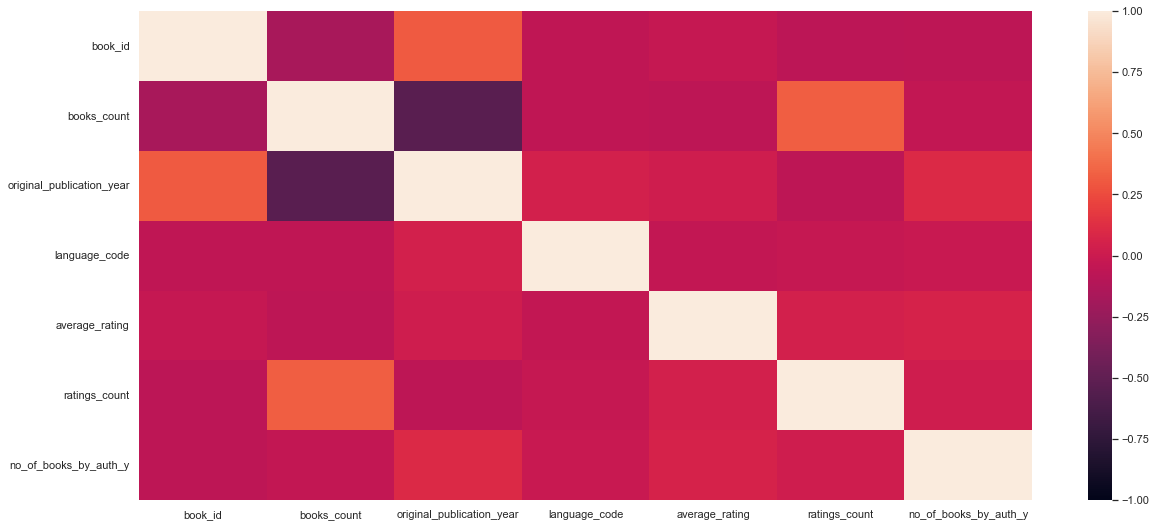

In [46]:
sns.set(rc = {'figure.figsize':(20,9)})
sns.set_theme()
corr = new_books.corr()
sns.heatmap(corr, vmin=-1, vmax=1)

#### From the above plot, it clear that number of book by authors affects the rating of the book but it is not significantly different then how it is affected by publication year or ratings count.

## 7. Is there any difference between the average rating of the users who rate more frequently than those who don’t?

In [47]:
#Making count of rating for each user

rating_counts = averageR.groupby('user_id').count().reset_index()[['user_id', 'rating']]
rating_counts['no. of ratings'] = rating_counts['rating']
rating_counts = rating_counts.drop(columns='rating')
rating_counts

,user_id,no. of ratings
0,1,3
1,2,3
2,3,2
3,4,3
4,5,5
...,...,...
53419,53420,6
53420,53421,8
53421,53422,18
53422,53423,2


In [48]:
q7 = pd.merge(averageR, rating_counts, on='user_id')
q7

,book_id,user_id,rating,book_count,book_cnt_grp,no. of ratings
0,1,314,5,181,50+ books,181
1,3,314,3,181,50+ books,181
2,5,314,4,181,50+ books,181
3,6,314,5,181,50+ books,181
4,12,314,4,181,50+ books,181
...,...,...,...,...,...,...
981751,9985,43623,5,2,<10 books,2
981752,9988,24406,5,2,<10 books,2
981753,9997,24406,5,2,<10 books,2
981754,9991,27590,4,2,<10 books,2


In [49]:
qq7 = q7.groupby('user_id').mean()
qq7 = qq7.reset_index()
qq7 = qq7[['user_id', 'rating']]
qq7

,user_id,rating
0,1,3.666667
1,2,4.333333
2,3,1.000000
3,4,4.000000
4,5,4.200000
...,...,...
53419,53420,3.333333
53420,53421,5.000000
53421,53422,4.166667
53422,53423,5.000000


In [50]:
qqq7 = pd.merge(qq7, q7[['user_id', 'no. of ratings']])
qqqq7 = qqq7.drop_duplicates()
qqqq7

,user_id,rating,no. of ratings
0,1,3.666667,3
3,2,4.333333,3
6,3,1.000000,2
8,4,4.000000,3
11,5,4.200000,5
...,...,...,...
981706,53420,3.333333,6
981712,53421,5.000000,8
981720,53422,4.166667,18
981738,53423,5.000000,2


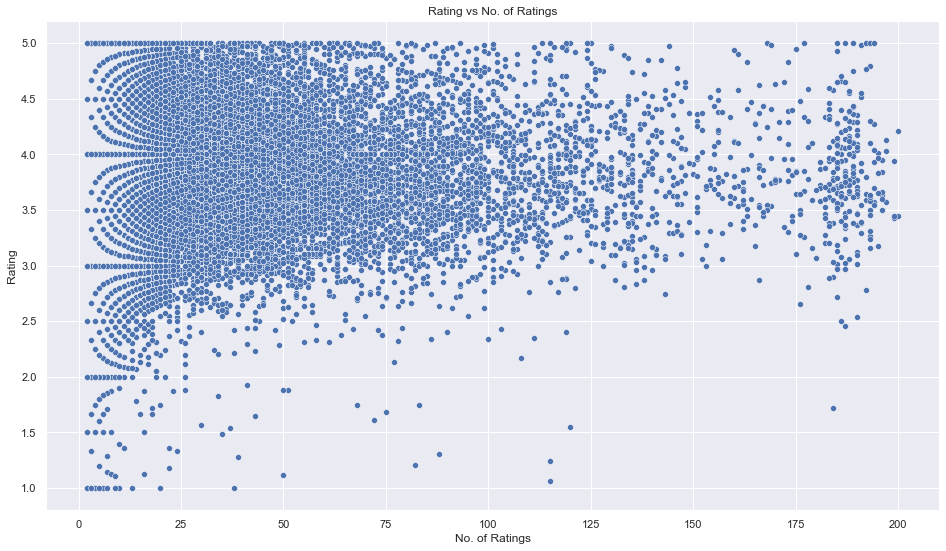

In [51]:
plt.rc("font", size=15)
fig = plt.subplots(figsize=(16, 9))


plt.title('Rating vs No. of Ratings')
plt.xlabel('No. of Ratings')
plt.ylabel('Rating')

sns.set_theme()
sns.scatterplot(x=qqqq7['no. of ratings'], y=qqqq7['rating'])

plt.show()

#### It is clear from the above figure that the average rating range between 2.5 - 5 for frequent readers; whilst it for occassional readers it is widely spreaded throughtout the entire rating band.

## 8. Based on the data, do you agree or disagree with the following hypothesis: “if a book has many volumes it is more likely that is higher rating”. Whether your answer is a yes or no explain why.

In [52]:
books

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m/3.jpg,https://images.gr-assets.com/books/1474154022s/3.jpg
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m/41865.jpg,https://images.gr-assets.com/books/1361039443s/41865.jpg
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m/2657.jpg,https://images.gr-assets.com/books/1361975680s/2657.jpg
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m/4671.jpg,https://images.gr-assets.com/books/1490528560s/4671.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m/7130616.jpg,https://images.gr-assets.com/books/1307445460s/7130616.jpg
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png,https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf249278a81aabab721ef782c4a74.png
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m/77431.jpg,https://images.gr-assets.com/books/1455373531s/77431.jpg
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from the Frontlines of the New Girlie-Girl Culture,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m/8565083.jpg,https://images.gr-assets.com/books/1279214118s/8565083.jpg


The title contains the volume number in the end. So, extracting that part of the title using a function.

In [53]:
def q8Function(x):
    if '#' in x:
        volume = x.split('#')[-1][:-1]
    else:
        volume = 0
    return volume

In [54]:
books['vols'] = new_books['title'].apply(q8Function)
books['vols'].unique()
# booksRatings['vols'] = booksRatings.astype(int)

array(['1', '2', '3', '1-3', '5', '4', '7', '6', '1-4', '1-5', '3.5',
       '1.5', '1-4 + 3.5', '4.5', 0, '1-2', '0.1 - 0.4', '0.1', '2.5',
       '0.2', '0.4', '0.3', '2-3', '3: Part 2 of 2', '3: Part 1 of 2',
       '5, Part 1 of 2', '5, Part 2 of 2', '1.2', '1.1', '13', '0.5', '8',
       '1-8', '8.5', '7.5', '9', '12', '10', '15', '11', '8.1', '1-7',
       '17', '23', '24', '14', '19', '39', '20', '32', '37', '36', '29',
       '21', '0.5, 2.5', '0.4, 0.5, 2.5, 2.6', '3-4', '16', '18', '12.5',
       '22', '13.5', '14.5', '0', '1-1', '1-6', '5, Part 1', '1-',
       '0.1-0.5', '28', '3 ', '6.5', '15.5', '16.5', '17.5', '25', '26',
       '1-9', '31', '42', '35', '34', '38', '40', '30', '27', '5.5', '',
       '5-6', '7-9', '4-6', '3.3', '1–3', '1 de ', '3; Part 2',
       '3; Part 1', 'GIRLBOS', '1-10', '1-12', '1/2', '13-24', '33', ' 2',
       '1-21', '25-36', ' 1', nan], dtype=object)

This contains a very alrge number of volumes and some of them are hard to convert into meaningful volumes. So, creating a column which specifies whether a book has different volumes or not.

In [55]:
# booksRatings = booksRatings[booksRatings['vols'].str.contains('GIRLBOS')==False]
# booksRatings['vols'].unique()

In [56]:
def q8Function2(x):
    volume = ''
    if x == '0':
        volume = '0'
    else:
        volume = 'More than 1'
    return volume

In [57]:
books['correctedVols'] = books['vols'].apply(q8Function2)
books['correctedVols'].unique()

array(['More than 1', '0'], dtype=object)

In [58]:
q8 = books.groupby('correctedVols').mean().reset_index()[['correctedVols', 'average_rating']]
q8 = q8.sort_values('average_rating', ascending=False)

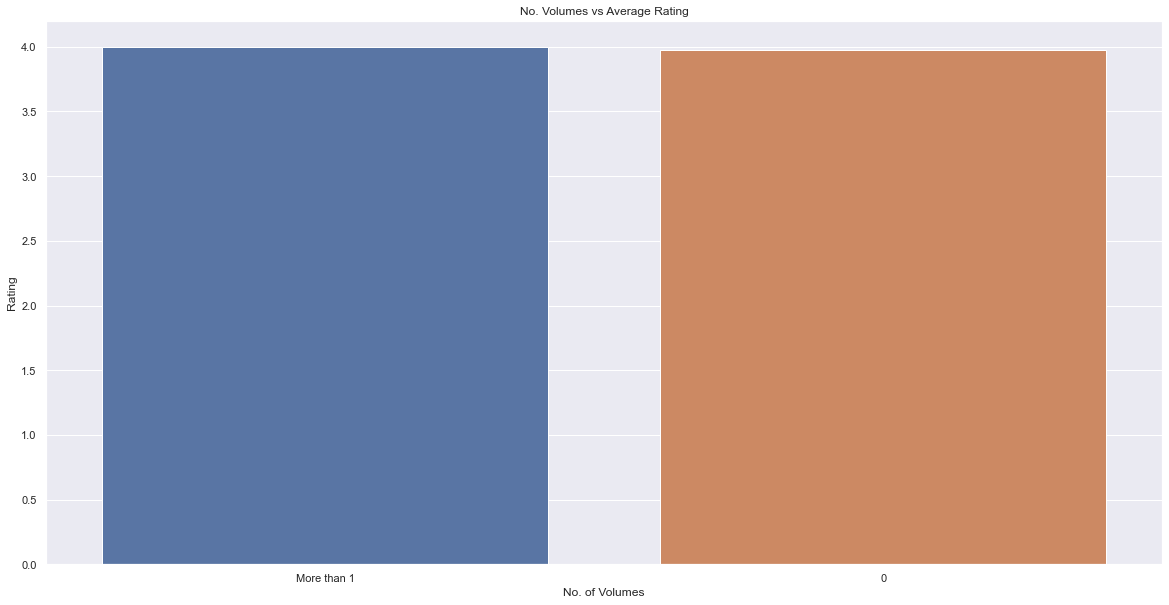

In [59]:
plt.rc("font", size=15)
fig = plt.subplots(figsize=(20, 10))


plt.title('No. Volumes vs Average Rating')

sns.barplot(x=q8['correctedVols'], y=q8['average_rating'])

plt.xlabel('No. of Volumes')
plt.ylabel('Rating')
plt.show()

## 9. Build a user-based recommendation engine using the collaborative filtering method. Before building the model, please split your data randomly to train and test. Use train dataset to build the model and test to make recommendations

In [60]:
from surprise import Reader
from surprise import KNNWithMeans
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [61]:
q9 = pd.merge(ratings, books, on='book_id')[['book_id', 'user_id', 'rating', 'title']]
q9

,book_id,user_id,rating,title
0,1,314,5,"Harry Potter and the Half-Blood Prince (Harry Potter, #6)"
1,1,439,3,"Harry Potter and the Half-Blood Prince (Harry Potter, #6)"
2,1,588,5,"Harry Potter and the Half-Blood Prince (Harry Potter, #6)"
3,1,1169,4,"Harry Potter and the Half-Blood Prince (Harry Potter, #6)"
4,1,1185,4,"Harry Potter and the Half-Blood Prince (Harry Potter, #6)"
...,...,...,...,...
79696,9998,51295,5,The Woman in the Dunes
79697,9998,51559,5,The Woman in the Dunes
79698,9998,52087,4,The Woman in the Dunes
79699,9998,52330,4,The Woman in the Dunes


In [62]:
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute similarities between items
}

algo = KNNWithMeans(sim_options=sim_options)

In [63]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [64]:
df = q9.copy()
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'book_id', 'rating']], reader)

In [65]:
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse    0.917284
test_mae     0.734115
fit_time     4.519261
test_time    0.285883
dtype: float64

In [66]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse    1.063604
test_mae     0.836928
fit_time     6.373616
test_time    0.242553
dtype: float64

### It is clear that for the given dataset much better results can be obtained with SVD approach - both in terms of accuracy and training / testing time.

In [67]:
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

## 10. Compare recommendations to actual ratings. For this step you need to choose an evaluation metric and report that.

In [68]:
dfPred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'predicted_rating', 'details'])
dfPred['impossible'] = dfPred['details'].apply(lambda x: x['was_impossible'])
dfPred['predicted_rating_rounded'] = dfPred['predicted_rating'].round()
dfPred['absolute_error'] = abs(dfPred['predicted_rating'] - dfPred['actual_rating'])
dfPred.drop(['details'], axis=1, inplace=True)
dfPred.sample(5)

,user_id,isbn,actual_rating,predicted_rating,impossible,predicted_rating_rounded,absolute_error
116,9289,2165,4.0,3.966592,False,4.0,0.033408
2999,33713,360,4.0,4.101066,False,4.0,0.101066
6606,13753,6185,4.0,3.955709,False,4.0,0.044291
647,46872,1191,3.0,3.724198,False,4.0,0.724198
8245,43158,8960,4.0,3.235739,False,3.0,0.764261


In [69]:
predictions

[Prediction(uid=45933, iid=6541, r_ui=3.0, est=3.451833741708031, details={'was_impossible': False}),
 Prediction(uid=49510, iid=5196, r_ui=4.0, est=3.9761199862316565, details={'was_impossible': False}),
 Prediction(uid=17917, iid=9549, r_ui=4.0, est=3.623456777377795, details={'was_impossible': False}),
 Prediction(uid=25485, iid=5946, r_ui=5.0, est=4.116352909426477, details={'was_impossible': False}),
 Prediction(uid=39974, iid=7815, r_ui=5.0, est=4.502326129970458, details={'was_impossible': False}),
 Prediction(uid=14919, iid=9010, r_ui=3.0, est=3.9775623294739035, details={'was_impossible': False}),
 Prediction(uid=669, iid=4009, r_ui=1.0, est=2.4775104178458953, details={'was_impossible': False}),
 Prediction(uid=36650, iid=4950, r_ui=5.0, est=3.7569284616131013, details={'was_impossible': False}),
 Prediction(uid=12168, iid=3759, r_ui=2.0, est=4.130897123044134, details={'was_impossible': False}),
 Prediction(uid=5610, iid=105, r_ui=1.0, est=3.3479700381329267, details={'was_i

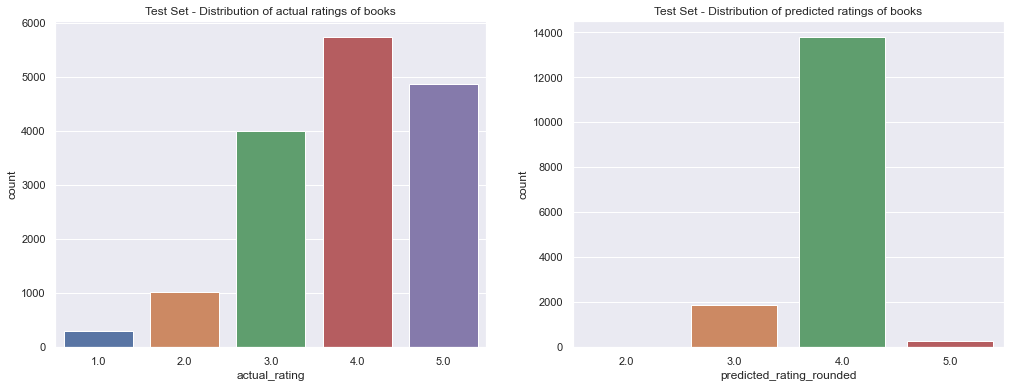

In [70]:
palette = sns.color_palette()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))

sns.countplot(x='actual_rating', data=dfPred, palette=palette, ax=ax1)
ax1.set_title('Test Set - Distribution of actual ratings of books')

sns.countplot(x='predicted_rating_rounded', data=dfPred, palette=palette, ax=ax2)
ax2.set_title('Test Set - Distribution of predicted ratings of books')

plt.show()

In [71]:
dfPredErr = dfPred.groupby('actual_rating')['absolute_error'].mean().reset_index()

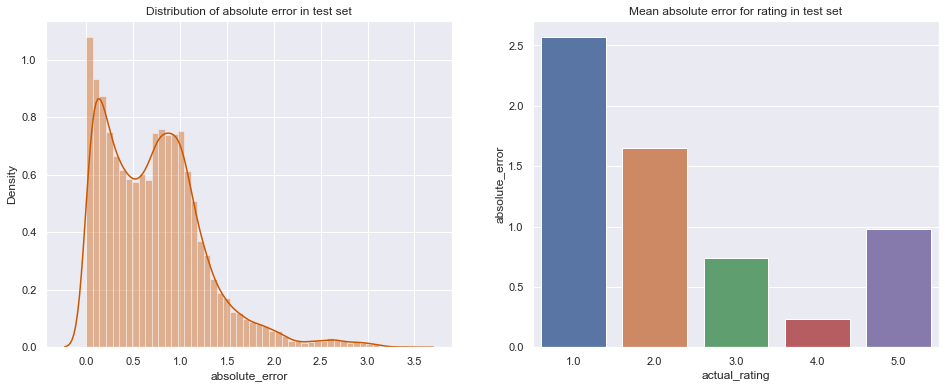

In [74]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.distplot(dfPred['absolute_error'], color='#cc5500', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='absolute_error', data=dfPredErr, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

#### The distribution of absolute errors is right-skewed, which means the majority of errors is small: between 0 and 1.5 which is extended till the value of 3.5.

#### Model works very well with the rating of 4 but is not efficient for predicting any other rating values as it is predicting "4" for most of the books; may be because it is an imbalance data.